In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("/content/drive/MyDrive/MDTE25/project2/single_genre_artists.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MDTE25/project2/single_genre_artists.csv'

In [54]:
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [55]:
df.shape

(95837, 23)

In [56]:
df.describe()

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
count,95837.000000,9.583700e+04,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,9.583700e+04,95837.000000
mean,26.066394,2.087320e+05,0.029644,0.586853,0.541083,5.196782,-10.157862,0.648069,0.168832,0.458989,0.082145,0.224916,0.574281,117.539870,3.851362,1.979919e+05,42.819329
std,16.254133,1.177526e+05,0.169604,0.155422,0.236304,3.534923,4.748798,0.477575,0.275417,0.330416,0.232440,0.185829,0.248126,30.190399,0.544406,7.807520e+05,20.897833
min,0.000000,6.373000e+03,0.000000,0.000000,0.000020,0.000000,-50.174000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,13.000000,1.573330e+05,0.000000,0.488000,0.365000,2.000000,-12.723000,0.000000,0.034100,0.133000,0.000000,0.100000,0.378000,94.829000,4.000000,2.563000e+03,28.000000
50%,26.000000,2.040000e+05,0.000000,0.605000,0.542000,5.000000,-9.397000,1.000000,0.046200,0.453000,0.000004,0.149000,0.589000,116.595000,4.000000,1.595600e+04,40.000000
75%,37.000000,2.502670e+05,0.000000,0.700000,0.727000,8.000000,-6.692000,1.000000,0.103000,0.759000,0.001300,0.302000,0.780000,135.975000,4.000000,8.495100e+04,56.000000
max,98.000000,4.800118e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.968000,0.996000,1.000000,0.997000,1.000000,239.906000,5.000000,2.802643e+07,95.000000


In [57]:
df.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

In [58]:
df.dtypes

,0
id_songs,object
name_song,object
popularity_songs,int64
duration_ms,int64
explicit,int64
id_artists,object
release_date,object
danceability,float64
energy,float64
key,int64


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [60]:
df.isnull().sum()

,0
id_songs,0
name_song,0
popularity_songs,0
duration_ms,0
explicit,0
id_artists,0
release_date,0
danceability,0
energy,0
key,0


In [61]:
print(df.duplicated().sum())

0


DROP COLUMNS

In [62]:
cols_to_drop = ['track_name', 'artist_name', 'track_id']

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')
df.head()


,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [63]:
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


VISUALIZATION DISTRIBUTION

In [64]:
df = df.select_dtypes(include=[np.number])

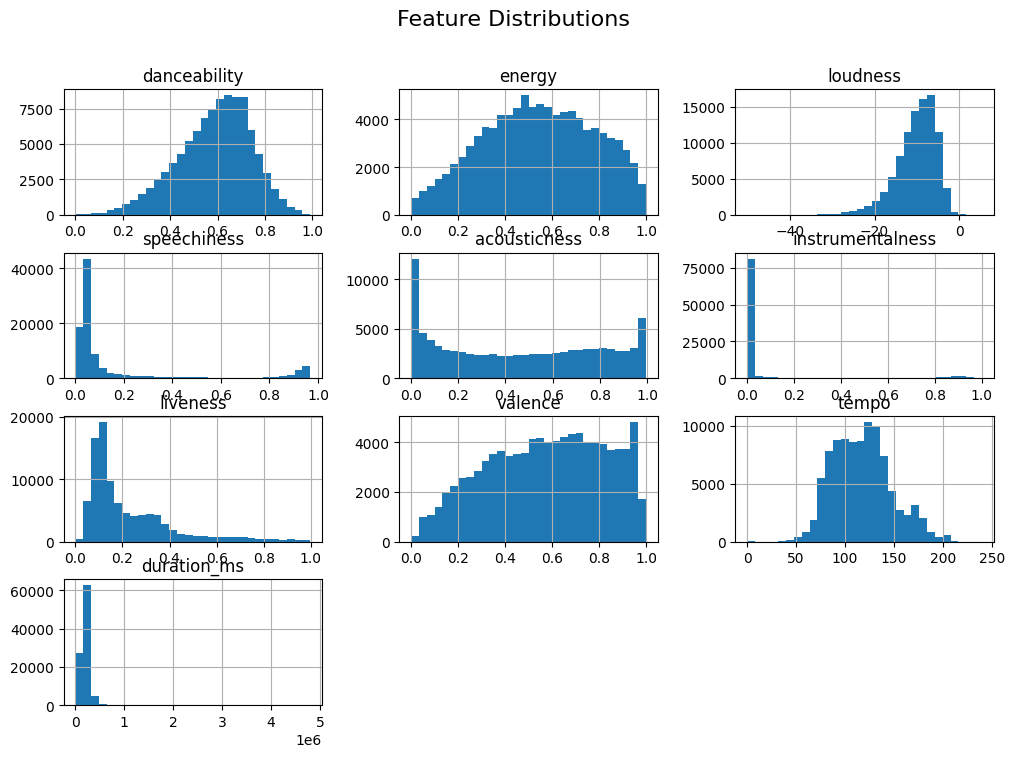

In [65]:
# Plot histograms for all numeric columns
key_fea = ['danceability','energy','loudness','speechiness',
    'acousticness','instrumentalness','liveness',
    'valence','tempo','duration_ms']
df[key_fea].hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


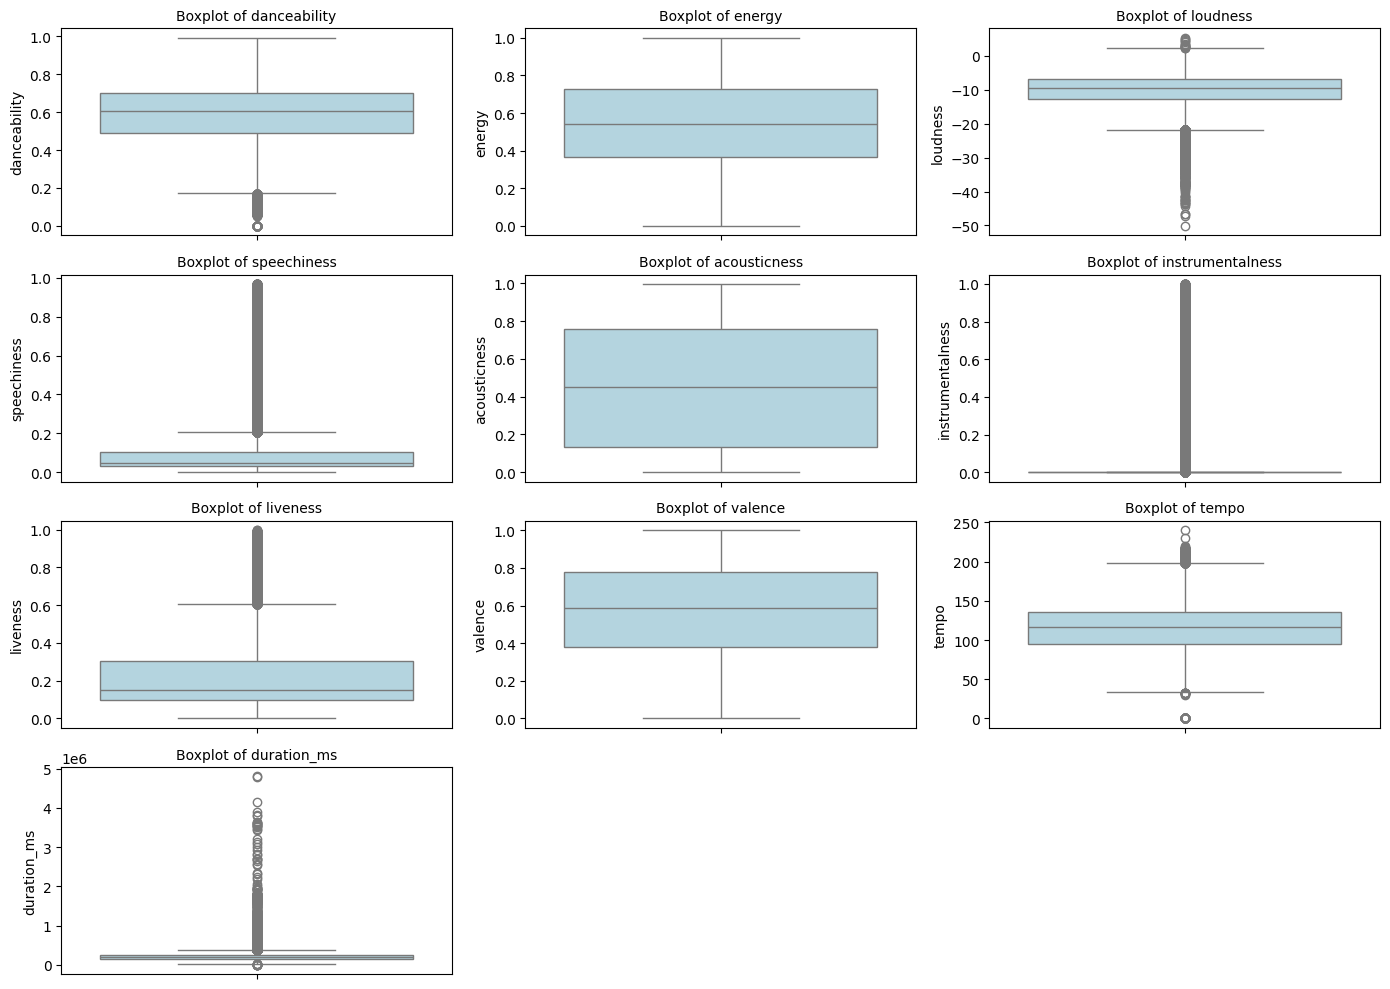

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to visualize (only those existing in df)
key_features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]

existing_features = [col for col in key_features if col in df.columns]

plt.figure(figsize=(14, 10))
for i, col in enumerate(existing_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}', fontsize=10)

plt.tight_layout()
plt.show()


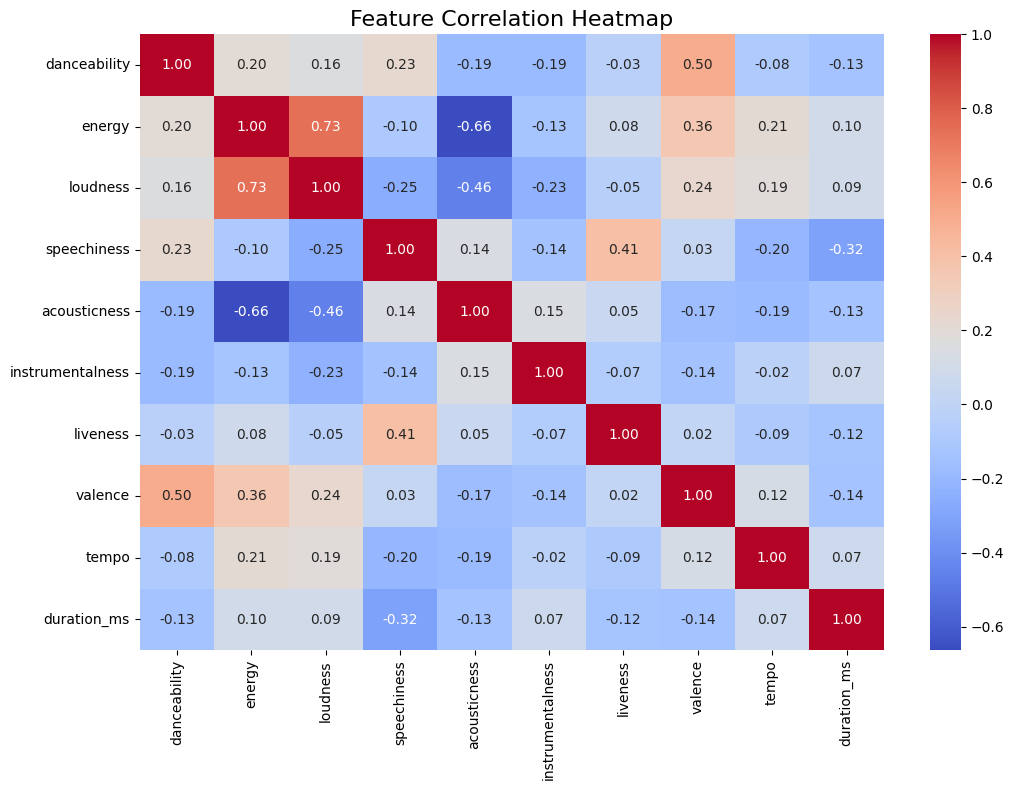

In [67]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[key_fea].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

NORMALIZATION

In [68]:
#Standard scaler
features = ['danceability','energy','loudness','speechiness',
            'acousticness','instrumentalness','liveness',
            'valence','tempo','duration_ms']
scaler = StandardScaler()
scaler.fit(df[features])
music_scaled = scaler.transform(df[features])

clustering

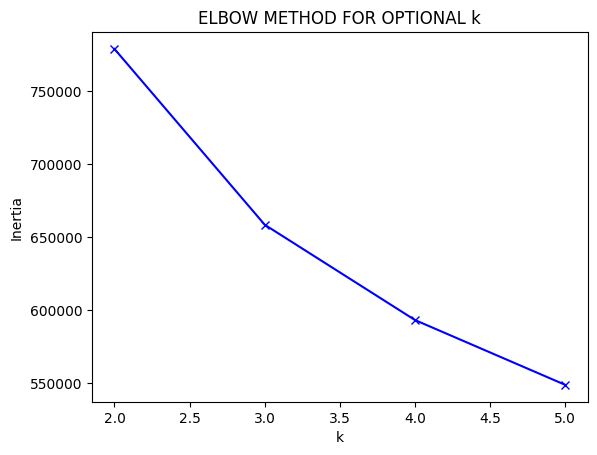

In [69]:
# K-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia=[]
K = range(2,6)
for k in K:
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(music_scaled)
  inertia.append(kmeans.inertia_)

plt.plot(K,inertia,'bx-')
plt.title('ELBOW METHOD FOR OPTIONAL k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()



k=2,Silhouette Score:0.2032
k=3,Silhouette Score:0.2423
k=4,Silhouette Score:0.2310
k=5,Silhouette Score:0.1864


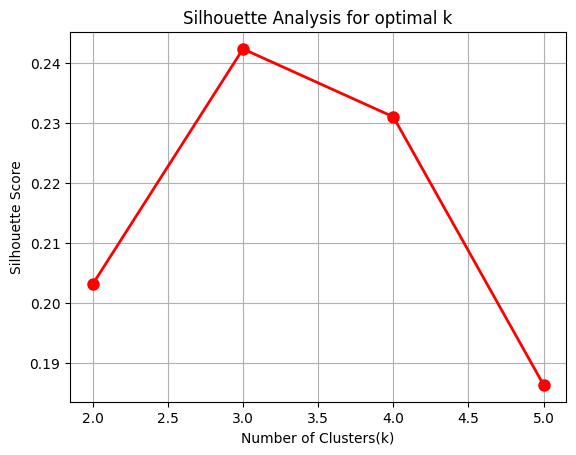

In [70]:
#silhouette score
sil_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
    labels = kmeans.fit_predict(music_scaled)
    sil_avg = silhouette_score(music_scaled,labels)
    sil_scores.append(sil_avg)
    print(f"k={k},Silhouette Score:{sil_avg:.4f}")

plt.plot(K,sil_scores,'ro-',linewidth=2,markersize=8)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for optimal k')
plt.grid(True)
plt.show()

In [71]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(music_scaled)
df['cluster'] = cluster_labels
df.head()


,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists,cluster
0,0,161427,0,0.563,0.184,4,-13.757,1,0.0512,0.993,0.000016,0.325,0.654,133.088,3,5078.0,22,0
1,0,223440,0,0.427,0.180,10,-15.375,1,0.0670,0.989,0.000000,0.128,0.431,78.459,3,5078.0,22,0
2,0,208267,0,0.511,0.206,0,-15.514,1,0.0592,0.995,0.000000,0.418,0.481,70.443,4,5078.0,22,0
3,0,161933,0,0.676,0.467,9,-12.393,0,0.1650,0.991,0.000000,0.219,0.726,129.775,4,5078.0,22,0
4,0,167973,0,0.650,0.298,9,-13.806,1,0.1380,0.991,0.000000,0.373,0.844,75.950,4,5078.0,22,0


In [72]:
# Compute metrics
sil_score = silhouette_score(music_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.2424


In [73]:
# Compute mean feature values per cluster
cluster_profiles = df.groupby('cluster')[features].mean()
print("\nCluster Profiles (Mean Feature Values):\n")
print(cluster_profiles.round(3))


Cluster Profiles (Mean Feature Values):

         danceability  energy  loudness  speechiness  acousticness  \
cluster                                                              
0               0.486   0.311   -13.209        0.060         0.750   
1               0.627   0.693    -7.609        0.075         0.259   
2               0.664   0.467   -13.364        0.830         0.586   

         instrumentalness  liveness  valence    tempo  duration_ms  
cluster                                                             
0                   0.169     0.182    0.413  111.933   223500.905  
1                   0.051     0.200    0.666  124.905   226568.205  
2                   0.001     0.435    0.584  100.387    97522.338  


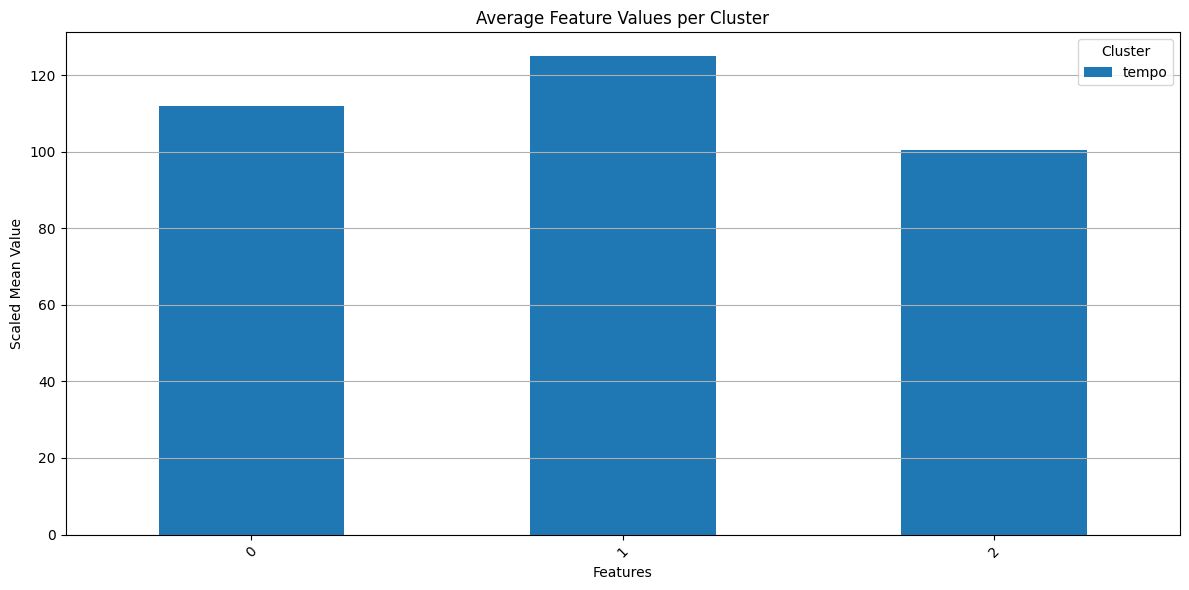

In [74]:
# Visualize cluster profiles
cluster_profiles["tempo"].plot(kind='bar', figsize=(12,6))
plt.title('Average Feature Values per Cluster')
plt.ylabel('Scaled Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

dendrogram

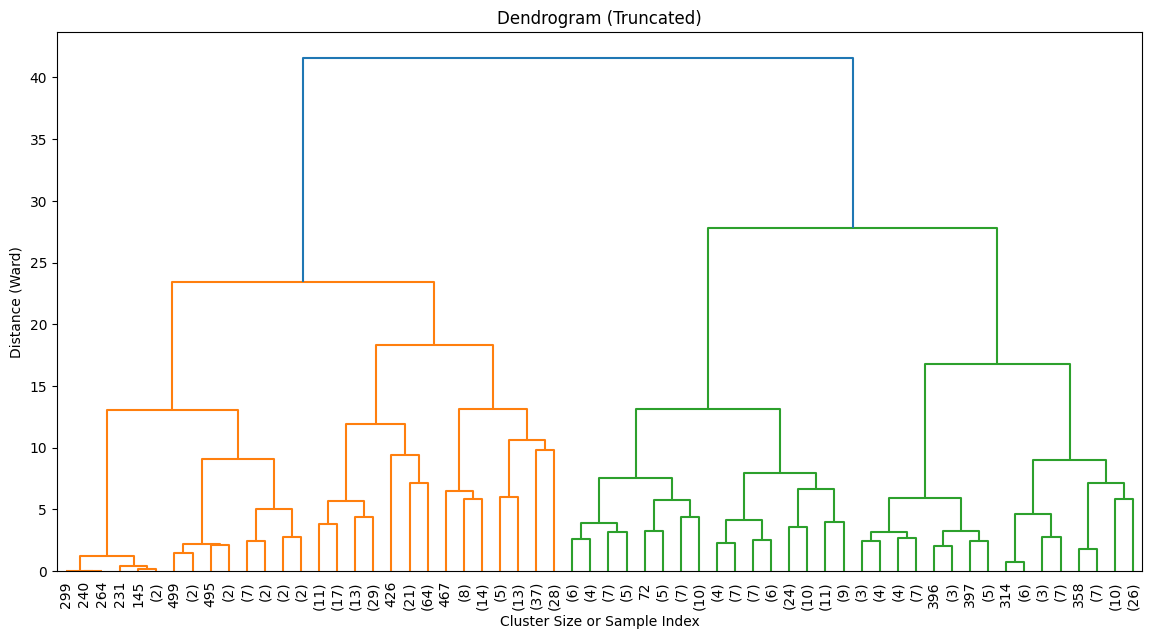

In [76]:

#dendrogram display
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use a sample (e.g., first 500 songs) for dendrogram — full dataset is too slow
sample_size = min(500, len(music_scaled))
X_sample = music_scaled[:sample_size]

# Compute linkage
linked = linkage(X_sample, method='ward')  # 'ward' minimizes within-cluster variance

# Plot
plt.figure(figsize=(14, 7))
dendrogram(linked,
           truncate_mode='level',
           p=5,  # show last 5 merges
           leaf_rotation=90,
           leaf_font_size=10)
plt.title('Dendrogram (Truncated)')
plt.xlabel('Cluster Size or Sample Index')
plt.ylabel('Distance (Ward)')
plt.grid(False)
plt.show()

In [29]:
# Hierarchical Clustering on Sampled Data

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Sample 3000 rows for hierarchical clustering
sample_size = 3000
np.random.seed(42)  # for reproducibility
sample_indices = np.random.choice(music_scaled.shape[0], size=sample_size, replace=False)
X_sample = music_scaled[sample_indices]

# Apply clustering on sample
k = 4
hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels_hc = hc.fit_predict(X_sample)

# Assign cluster labels to original dataframe for the sampled rows
df['cluster_hc'] = np.nan  # initialize with NaN
df.loc[sample_indices, 'cluster_hc'] = cluster_labels_hc

# Optional: Create sampled df with labels
df_sampled = df.iloc[sample_indices].copy()
df_sampled['cluster_hc'] = cluster_labels_hc
df['cluster_hc'] =df_sampled['cluster_hc']

# Evaluate
score = silhouette_score(X_sample, cluster_labels_hc)
print(f" Hierarchical clustering applied on {sample_size} samples.")
print(f" Hierarchical ({k} clusters) → Silhouette Score: {score:.4f}")

 Hierarchical clustering applied on 3000 samples.
 Hierarchical (4 clusters) → Silhouette Score: 0.2160


DBSCAN

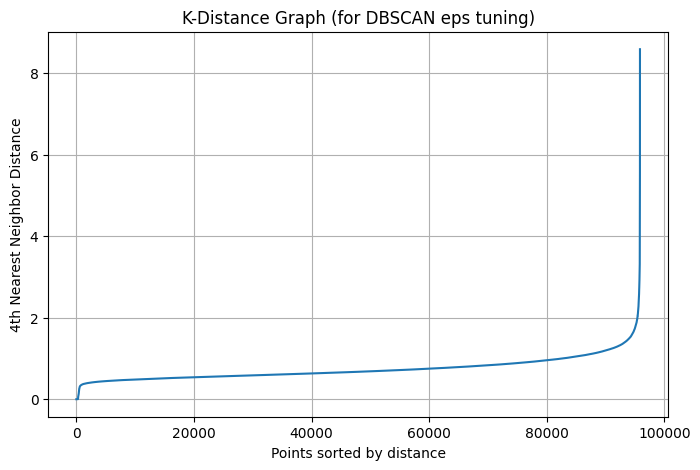

In [30]:

from sklearn.neighbors import NearestNeighbors

# Calculate distance to 4th nearest neighbor (min_samples - 1)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(music_scaled)
distances, indices = neighbors_fit.kneighbors(music_scaled)

# Sort distances
distances = np.sort(distances[:, 3], axis=0)  # 4th column

# Plot
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('K-Distance Graph (for DBSCAN eps tuning)')
plt.grid(True)
plt.show()

evaluvation and interpretation

In [77]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluation metrics for K-Means
sil_score = silhouette_score(music_scaled, df['cluster'])
db_index = davies_bouldin_score(music_scaled, df['cluster'])
inertia = kmeans.inertia_

print("📊 Cluster Evaluation Metrics")
print("---------------------------------")
print(f"Silhouette Score: {sil_score:.4f} (Higher = Better)")
print(f"Davies-Bouldin Index: {db_index:.4f} (Lower = Better)")
print(f"Inertia (Compactness): {inertia:.4f} (Lower = Better for same k)")


📊 Cluster Evaluation Metrics
---------------------------------
Silhouette Score: 0.2424 (Higher = Better)
Davies-Bouldin Index: 1.5699 (Lower = Better)
Inertia (Compactness): 658335.9622 (Lower = Better for same k)


In [78]:
cluster_profile = df.groupby("cluster")[features].mean().round(3)
cluster_profile


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,
0,0.486,0.311,-13.209,0.060,0.750,0.169,0.182,0.413,111.933,223500.905
1,0.627,0.693,-7.609,0.075,0.259,0.051,0.200,0.666,124.905,226568.205
2,0.664,0.467,-13.364,0.830,0.586,0.001,0.435,0.584,100.387,97522.338


In [79]:
cluster_insights = []

for cluster, row in cluster_profile.iterrows():
    insight = f"Cluster {cluster}: "

    if row["danceability"] > 0.7 and row["energy"] > 0.7:
        insight += "🔥 High-energy dance / party tracks"

    elif row["acousticness"] > 0.6 and row["instrumentalness"] < 0.3:
        insight += "🎸 Chill acoustic / singer-songwriter style"

    elif row["instrumentalness"] > 0.6:
        insight += "🎼 Instrumental / ambient / soundtrack style"

    elif row["speechiness"] > 0.5:
        insight += "🎤 Spoken-word / rap / hip-hop style"

    elif row["valence"] > 0.6:
        insight += "😊 Happy / upbeat mood tracks"

    else:
        insight += "🎧 Mixed genre / neutral mood tracks"

    cluster_insights.append(insight)

for line in cluster_insights:
    print(line)


Cluster 0: 🎸 Chill acoustic / singer-songwriter style
Cluster 1: 😊 Happy / upbeat mood tracks
Cluster 2: 🎤 Spoken-word / rap / hip-hop style


In [96]:
for c in df['cluster'].unique():
    print(f"\n🎯 Top items in Cluster {c}:")
    display(df[df['cluster'] == c].head(5))



🎯 Top items in Cluster 0:


,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,followers,popularity_artists,cluster,PC1,PC2,PCA1,PCA2,cluster_dbscan,Cluster_Label,cluster_hc
0,0,161427,0,0.563,0.184,4,-13.757,1,0.0512,0.993,...,5078.0,22,0,-1.676304,0.291571,-1.676304,0.291571,0.0,Instrumental / Acoustic,NaN
1,0,223440,0,0.427,0.180,10,-15.375,1,0.0670,0.989,...,5078.0,22,0,-2.639968,-0.472803,-2.639968,-0.472803,0.0,Instrumental / Acoustic,NaN
2,0,208267,0,0.511,0.206,0,-15.514,1,0.0592,0.995,...,5078.0,22,0,-2.537328,0.474464,-2.537328,0.474464,0.0,Instrumental / Acoustic,NaN
3,0,161933,0,0.676,0.467,9,-12.393,0,0.1650,0.991,...,5078.0,22,0,-0.677418,0.709757,-0.677418,0.709757,0.0,Instrumental / Acoustic,NaN
4,0,167973,0,0.650,0.298,9,-13.806,1,0.1380,0.991,...,5078.0,22,0,-1.480657,1.426716,-1.480657,1.426716,0.0,Instrumental / Acoustic,NaN



🎯 Top items in Cluster 1:


,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,followers,popularity_artists,cluster,PC1,PC2,PCA1,PCA2,cluster_dbscan,Cluster_Label,cluster_hc
15,0,140867,0,0.760,0.366,2,-10.173,1,0.0650,0.939,...,5078.0,22,1,-0.331644,1.265828,-0.331644,1.265828,0.0,Mainstream / Party,NaN
34,0,185973,0,0.650,0.520,9,-12.068,1,0.0817,0.953,...,28.0,0,1,-0.198300,0.254653,-0.198300,0.254653,0.0,Mainstream / Party,NaN
38,0,140267,0,0.769,0.442,2,-12.697,0,0.2730,0.989,...,28.0,0,1,-0.390424,1.389289,-0.390424,1.389289,0.0,Mainstream / Party,NaN
128,3,182333,0,0.794,0.431,3,-9.439,1,0.0638,0.885,...,21786.0,34,1,-0.303957,0.608006,-0.303957,0.608006,0.0,Mainstream / Party,NaN
152,3,162733,0,0.819,0.371,5,-9.272,1,0.0855,0.992,...,21786.0,34,1,-0.181114,1.040296,-0.181114,1.040296,0.0,Mainstream / Party,NaN



🎯 Top items in Cluster 2:


,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,followers,popularity_artists,cluster,PC1,PC2,PCA1,PCA2,cluster_dbscan,Cluster_Label,cluster_hc
37,0,154691,0,0.710,0.561,5,-12.736,1,0.472,0.955,...,28.0,0,2,-0.597604,2.104354,-0.597604,2.104354,0.0,Happy / Dance,NaN
43,0,182440,0,0.613,0.457,7,-15.501,1,0.510,0.976,...,675.0,8,2,-1.640149,1.540921,-1.640149,1.540921,0.0,Happy / Dance,NaN
50,0,150640,0,0.655,0.433,6,-15.925,0,0.409,0.989,...,675.0,8,2,-1.505454,1.801868,-1.505454,1.801868,0.0,Happy / Dance,NaN
55,0,170493,0,0.700,0.518,7,-11.155,1,0.363,0.948,...,675.0,8,2,-0.540945,1.820245,-0.540945,1.820245,0.0,Happy / Dance,NaN
58,0,164490,0,0.679,0.442,4,-12.630,1,0.466,0.903,...,675.0,8,2,-0.827433,1.301330,-0.827433,1.301330,0.0,Happy / Dance,NaN


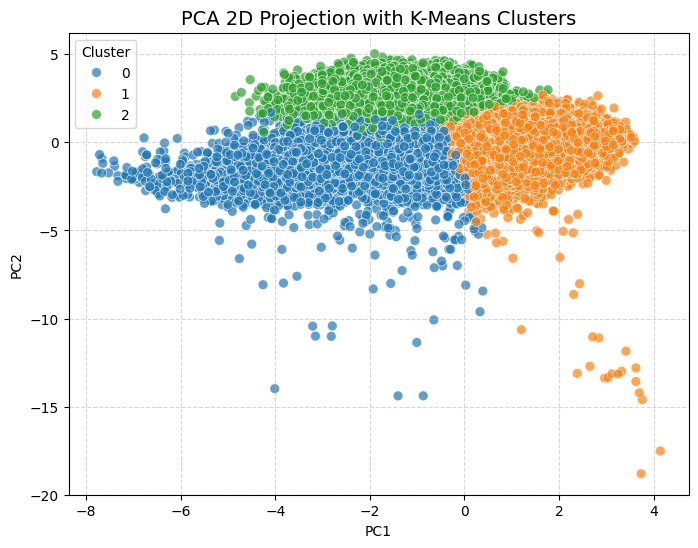

In [97]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply PCA
pca = PCA(n_components=2)
df[['PC1', 'PC2']] = pca.fit_transform(music_scaled)

# Plot PCA 2D with cluster colors
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cluster',       # cluster column in df
    palette='tab10',
    data=df,
    s=50,
    alpha=0.7
)
plt.title("PCA 2D Projection with K-Means Clusters", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

bar chart

<Figure size 1400x600 with 0 Axes>

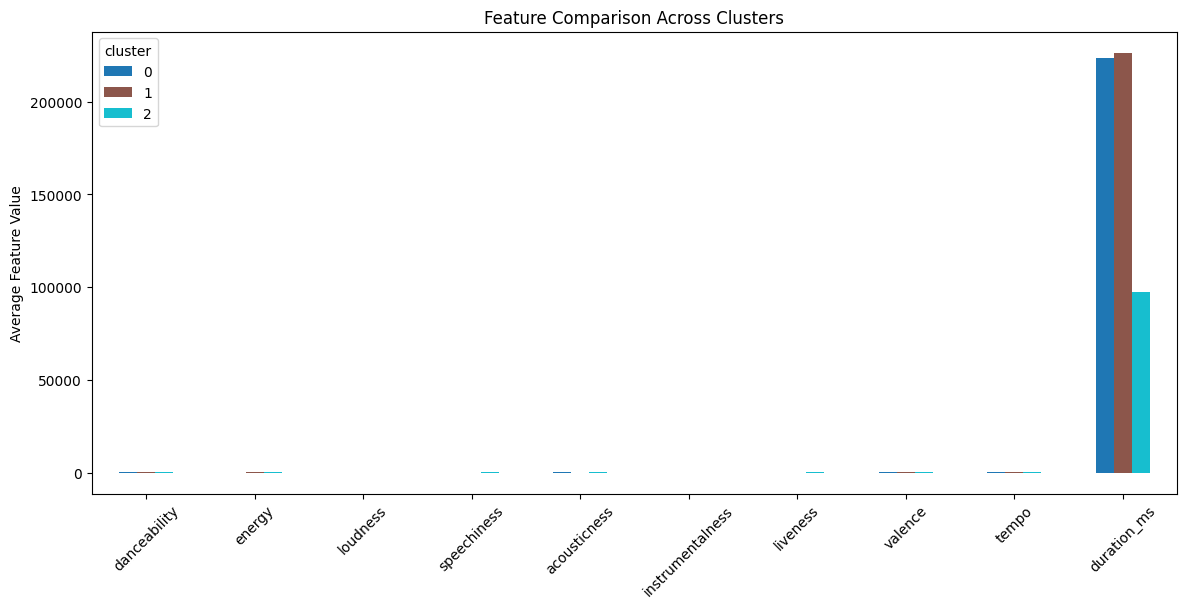

In [98]:
import seaborn as sns

cluster_means = df.groupby("cluster")[features].mean()

plt.figure(figsize=(14,6))
cluster_means.T.plot(kind='bar', figsize=(14,6), colormap='tab10')
plt.title("Feature Comparison Across Clusters")
plt.ylabel("Average Feature Value")
plt.xticks(rotation=45)
plt.show()


heatmap

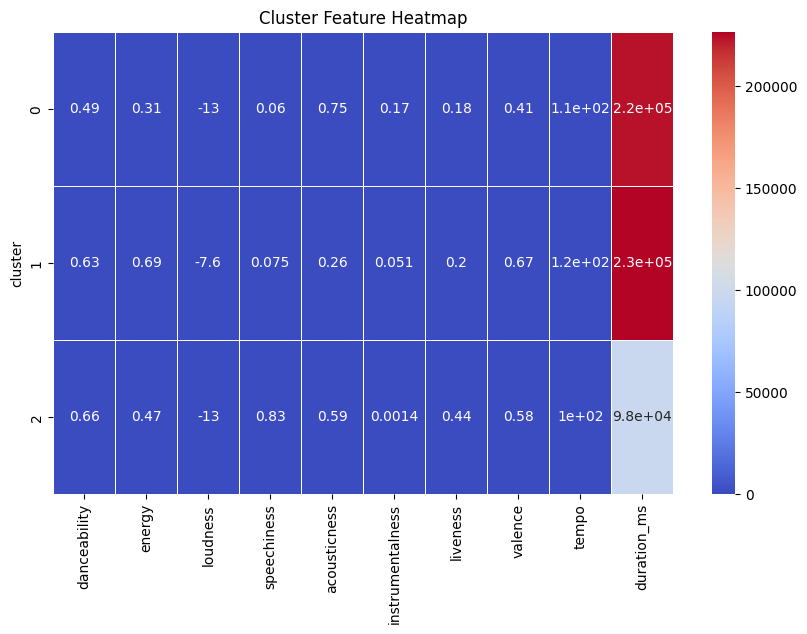

In [99]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Cluster Feature Heatmap")
plt.show()


distribution plot

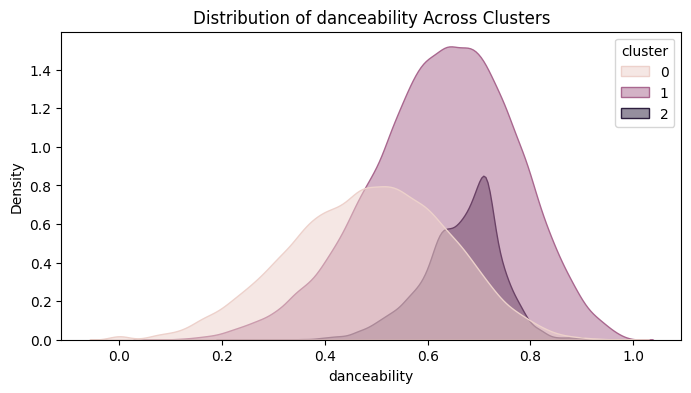

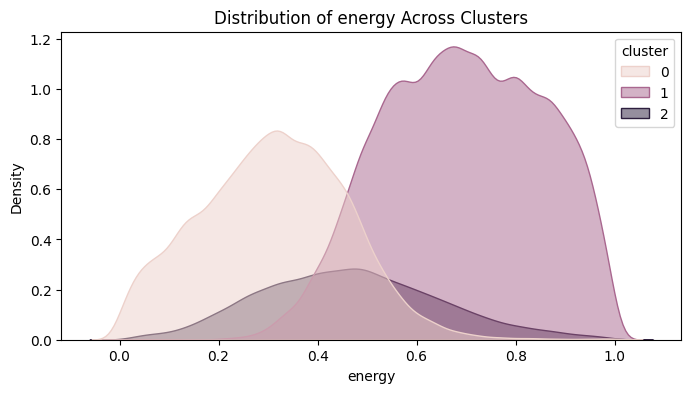

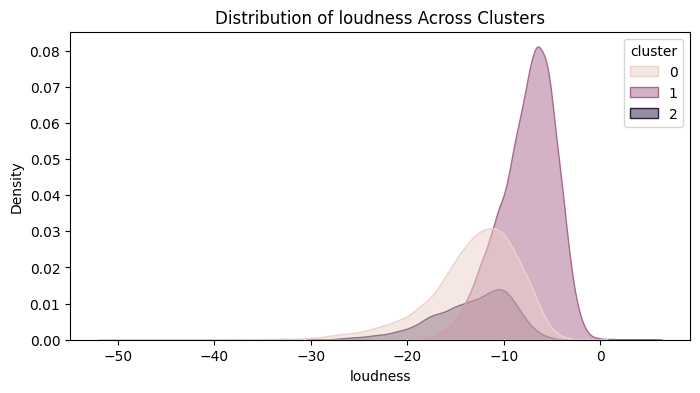

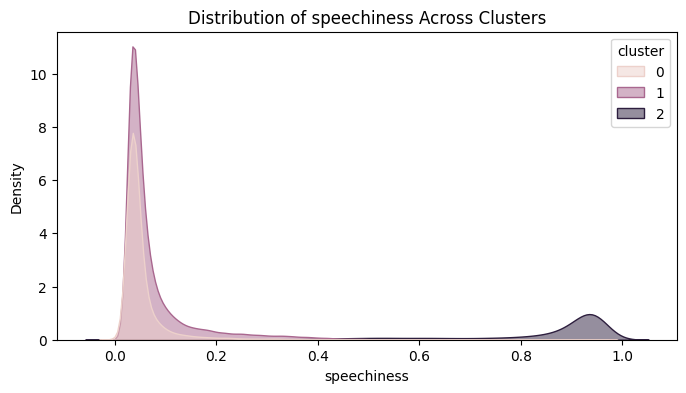

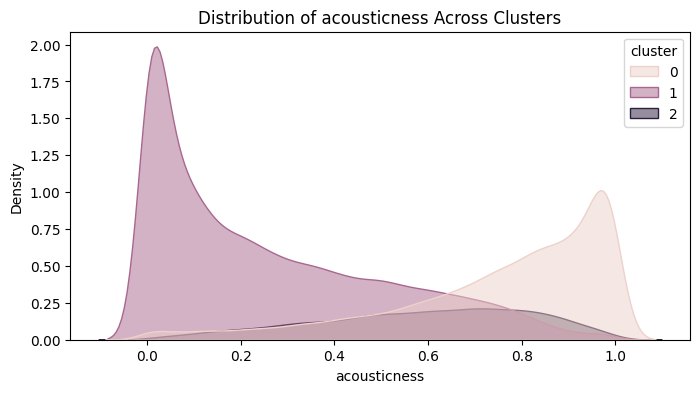

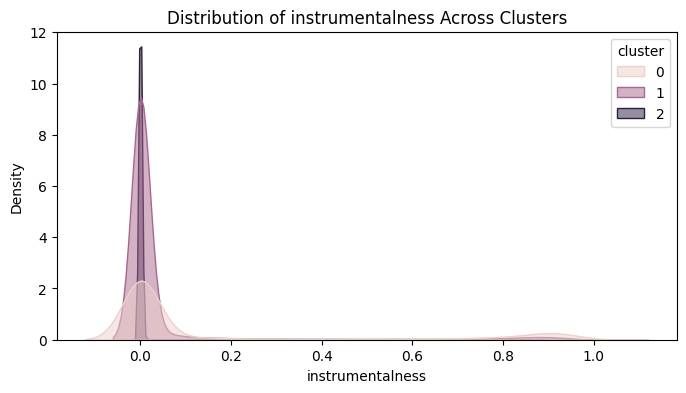

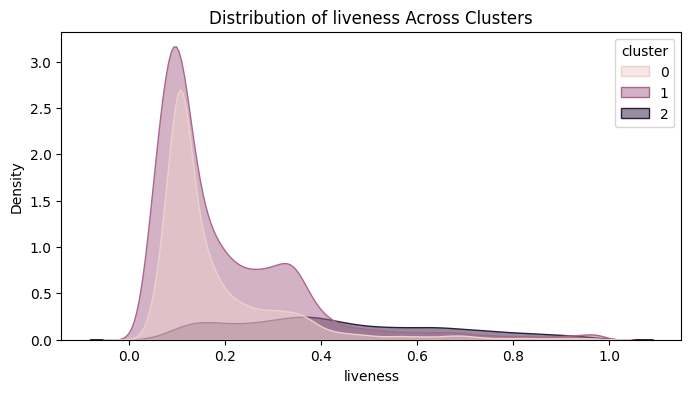

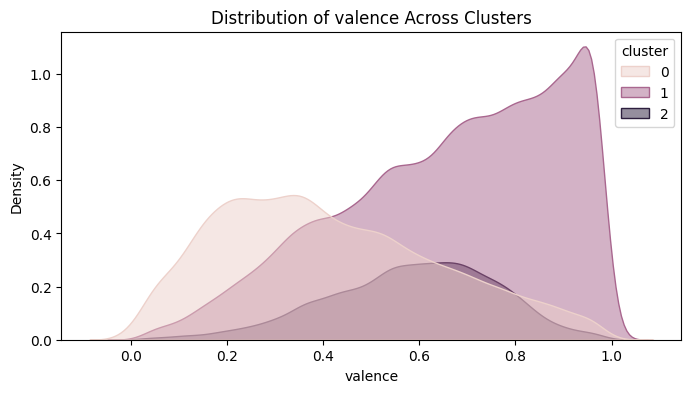

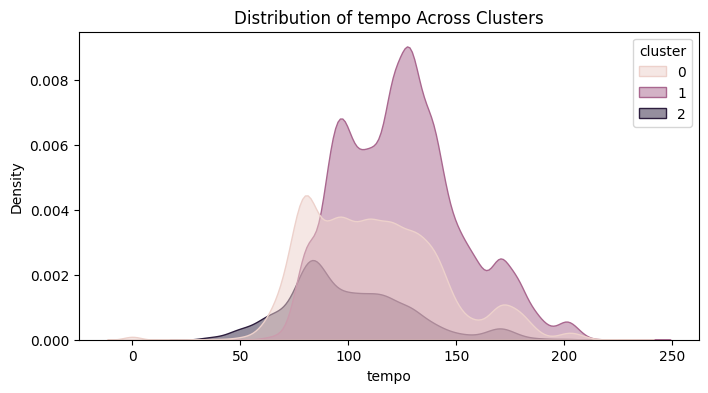

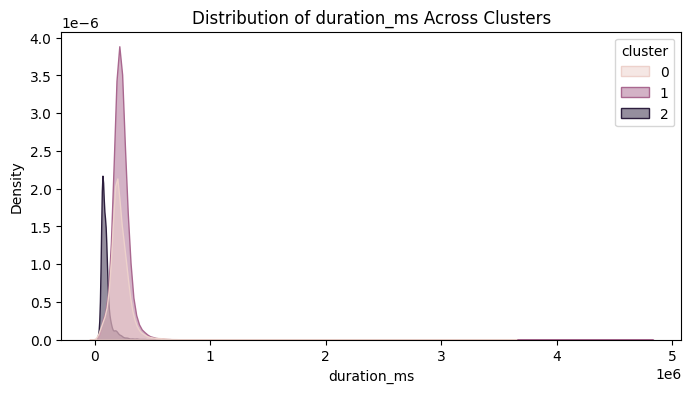

In [100]:
for feature in features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x=feature, hue="cluster", fill=True, alpha=0.5)
    plt.title(f"Distribution of {feature} Across Clusters")
    plt.show()


In [103]:
# ------------------------------
# 7. Final Analysis & Export
# ------------------------------

# Add cluster labels to original dataframe
df['cluster'] = cluster_labels

# Show top 5 rows of final dataset with cluster info
print("Dataset with cluster labels:")
display(df.head())

# Group by clusters and compute mean feature values
cluster_summary = df.groupby('cluster')[features].mean()

print("\nCluster Feature Summary:")
display(cluster_summary)

# Show sample songs from each cluster
print("\nSample Tracks from Each Cluster:")
for c in df['cluster'].unique():
    print(f"\nCluster {c}:")

    # If track_name and artist_name exist, show them
    if 'track_name' in df.columns and 'artist_name' in df.columns:
        display(df[df['cluster'] == c][['track_name', 'artist_name']].head(5))
    else:
        # Otherwise just show numeric preview
        display(df[df['cluster'] == c].head(5))

# Export results to CSV
output_path = "Final_Clustered_Music_Data.csv"
df.to_csv(output_path, index=False)

print(f"\n✔ Final dataset exported as: {output_path}")

# Export summary report
summary_path = "Cluster_Feature_Summary.csv"
cluster_summary.to_csv(summary_path)

print(f"✔ Cluster summary exported as: {summary_path}")


Dataset with cluster labels:


,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,followers,popularity_artists,cluster,PC1,PC2,PCA1,PCA2,cluster_dbscan,Cluster_Label,cluster_hc
0,0,161427,0,0.563,0.184,4,-13.757,1,0.0512,0.993,...,5078.0,22,Instrumental / Acoustic,-1.676304,0.291571,-1.676304,0.291571,0.0,Instrumental / Acoustic,NaN
1,0,223440,0,0.427,0.180,10,-15.375,1,0.0670,0.989,...,5078.0,22,Mainstream / Party,-2.639968,-0.472803,-2.639968,-0.472803,0.0,Instrumental / Acoustic,NaN
2,0,208267,0,0.511,0.206,0,-15.514,1,0.0592,0.995,...,5078.0,22,Happy / Dance,-2.537328,0.474464,-2.537328,0.474464,0.0,Instrumental / Acoustic,NaN
3,0,161933,0,0.676,0.467,9,-12.393,0,0.1650,0.991,...,5078.0,22,Vocal / Speech-heavy,-0.677418,0.709757,-0.677418,0.709757,0.0,Instrumental / Acoustic,NaN
4,0,167973,0,0.650,0.298,9,-13.806,1,0.1380,0.991,...,5078.0,22,Chill / Relaxing,-1.480657,1.426716,-1.480657,1.426716,0.0,Instrumental / Acoustic,NaN



Cluster Feature Summary:


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,
Chill / Relaxing,0.650,0.298,-13.806,0.1380,0.991,0.000000,0.373,0.844,75.950,167973.0
Happy / Dance,0.511,0.206,-15.514,0.0592,0.995,0.000000,0.418,0.481,70.443,208267.0
Instrumental / Acoustic,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088,161427.0
Mainstream / Party,0.427,0.180,-15.375,0.0670,0.989,0.000000,0.128,0.431,78.459,223440.0
Vocal / Speech-heavy,0.676,0.467,-12.393,0.1650,0.991,0.000000,0.219,0.726,129.775,161933.0



Sample Tracks from Each Cluster:

Cluster Instrumental / Acoustic:


,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,followers,popularity_artists,cluster,PC1,PC2,PCA1,PCA2,cluster_dbscan,Cluster_Label,cluster_hc
0,0,161427,0,0.563,0.184,4,-13.757,1,0.0512,0.993,...,5078.0,22,Instrumental / Acoustic,-1.676304,0.291571,-1.676304,0.291571,0.0,Instrumental / Acoustic,NaN



Cluster Mainstream / Party:


,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,followers,popularity_artists,cluster,PC1,PC2,PCA1,PCA2,cluster_dbscan,Cluster_Label,cluster_hc
1,0,223440,0,0.427,0.18,10,-15.375,1,0.067,0.989,...,5078.0,22,Mainstream / Party,-2.639968,-0.472803,-2.639968,-0.472803,0.0,Instrumental / Acoustic,NaN



Cluster Happy / Dance:


,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,followers,popularity_artists,cluster,PC1,PC2,PCA1,PCA2,cluster_dbscan,Cluster_Label,cluster_hc
2,0,208267,0,0.511,0.206,0,-15.514,1,0.0592,0.995,...,5078.0,22,Happy / Dance,-2.537328,0.474464,-2.537328,0.474464,0.0,Instrumental / Acoustic,NaN



Cluster Vocal / Speech-heavy:


,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,followers,popularity_artists,cluster,PC1,PC2,PCA1,PCA2,cluster_dbscan,Cluster_Label,cluster_hc
3,0,161933,0,0.676,0.467,9,-12.393,0,0.165,0.991,...,5078.0,22,Vocal / Speech-heavy,-0.677418,0.709757,-0.677418,0.709757,0.0,Instrumental / Acoustic,NaN



Cluster Chill / Relaxing:


,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,followers,popularity_artists,cluster,PC1,PC2,PCA1,PCA2,cluster_dbscan,Cluster_Label,cluster_hc
4,0,167973,0,0.65,0.298,9,-13.806,1,0.138,0.991,...,5078.0,22,Chill / Relaxing,-1.480657,1.426716,-1.480657,1.426716,0.0,Instrumental / Acoustic,NaN



Cluster nan:


,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,followers,popularity_artists,cluster,PC1,PC2,PCA1,PCA2,cluster_dbscan,Cluster_Label,cluster_hc



✔ Final dataset exported as: Final_Clustered_Music_Data.csv
✔ Cluster summary exported as: Cluster_Feature_Summary.csv
